In [2]:
# needed libraries
import numpy as np
import pandas as pd

In [30]:
# creating a variable called data_coin_flip
# then assgining: 0 for head and 1 for tail 
# we flip the coin 1000 times
data_coin_flips=np.random.randint(2,size=1000)

# getting the mean
np.mean(data_coin_flips)

0.494

In [31]:
#creating a variable called bernouli_flips
# we assign to it a random bininial distribution that takes n=1 and probability = 0.5 (fair coin) and 
# worked on size of 1000
bernouli_flips=np.random.binomial(n=1,p=.5,size=1000)

#getting the mean of bernouli
np.mean(bernouli_flips)

0.499

In [6]:
#prob mass function pmf
# The mass function is written as:
# f = p ** x * (1-p)** (1-x)
# so if x=1 we have f = p since (1-x)=0 then (1-p)**0=1
# if x=0 we get f= 1-p
# x could be 0 or 1 so there is not other value that x can take
def bern_pmf(x,p):
  if x==1:
    return p
  elif x==0:
    return 1- p
  else:
    return 'value not supported in distribution'

In [32]:
# printing out bern_pmf using x=1 and p =0.5
print(bern_pmf(1,0.5))

# printing out bern_pmf using x=0 and p =0.5
print(bern_pmf(0,0.5))

0.5
0.5


In [33]:
#needed libraries
import scipy.stats as st
from ast import increment_lineno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
# having the same value using np.product
np.product(st.bernoulli.pmf(1,0.5))

0.5

In [35]:
np.product(st.bernoulli.pmf(data_coin_flips,0.5))

9.332636185032189e-302

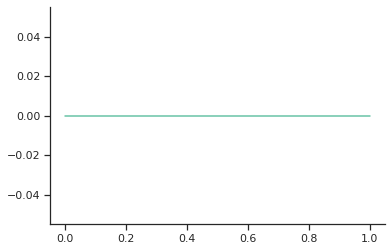

In [38]:
# styling sns
sns.set(style='ticks', palette='Set2')
# creating numeric sequances
params=np.linspace(0,1,100)
# creating a p_x variable that takes bernoulli distribution values for each p in params
p_x=[np.product(st.bernoulli.pmf(data_coin_flips,p)) for p in params]

#plotting
plt.plot(params,p_x)
sns.despine()

In [39]:
#creating fair_flips and bernoulli_flips and assigning a binomial distribution
fair_flips=bernouli_flips=np.random.binomial(n=1,p=.5,size=1000)

In [43]:
#having a p_fair that comes from an array of bernoulli distribution with a fair coin
p_fair=np.array([np.product(st.bernoulli.pmf(fair_flips,p)) for p in params])
p_fair=p_fair/np.sum(p_fair)


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.85335092e-22,
       2.43262044e-19, 9.02599286e-17, 2.03574171e-14, 2.83291498e-12,
       2.46478723e-10, 1.35657094e-08, 4.77181130e-07, 1.08238431e-05,
       1.59540511e-04, 1.53804351e-03, 9.74986279e-03, 4.08142114e-02,
       1.13187924e-01, 2.08406190e-01, 2.55064405e-01, 2.07534108e-01,
       1.12167300e-01, 4.01956340e-02, 9.52316002e-03, 1.48583679e-03,
      

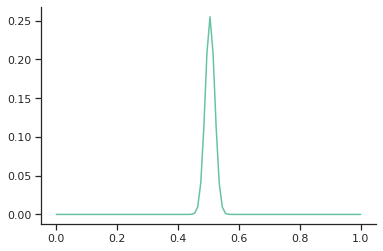

In [45]:
#plotting to check the distribution 
plt.plot(params,p_fair)
sns.despine()

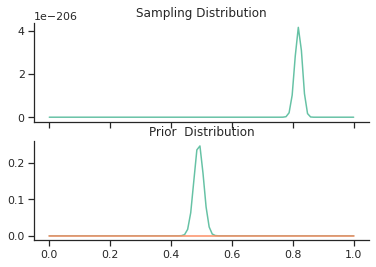

In [23]:
unfair_flips=bearnouli_flips=np.random.binomial(n=1,p=.8,size=1000)
p_unfair=np.array([np.product(st.bernoulli.pmf(unfair_flips,p)) for p in params])


fig, axes=plt.subplots(2,1,sharex=True)
axes[0].plot(params,p_unfair)
axes[0].set_title('Sampling Distribution')

axes[1].plot(params,p_fair)
axes[1].set_title('Prior  Distribution')


plt.plot(params,p_unfair)
sns.despine()

In [25]:
from IPython.core.pylabtools import figsize
def bern_post(n_params=100,n_sample=100,true_p=.8,prior_p=0.5,n_prior=100):
  params=np.linspace(0,1,n_params)
  sample=np.random.binomial(n=1,p=true_p,size=n_sample)
  likelihood=np.array([np.product(st.bernoulli.pmf(sample,p)) for p in params])
  likelihood=likelihood/np.sum(likelihood)
  prior_sample=np.random.binomial(n=1,p=prior_p,size=n_prior)
  prior=np.array([np.product(st.bernoulli.pmf(sample,p)) for p in params])
  prior=prior/np.sum(prior)
  posterior=[prior[i]*likelihood[i] for i in range(prior.shape[0])]
  posterior=posterior/np.sum(posterior)

  fig, axes=plt.subplots(3,1,sharex=True,figsize=(8,8))

  axes[0].plot(params,likelihood)
  axes[0].set_title('Sampling Distribution')

  axes[1].plot(params,prior)
  axes[1].set_title('Prior  Distribution')

  axes[2].plot(params,posterior)
  axes[2].set_title('posterior  Distribution')

  sns.despine()
  plt.tight_layout()

  return posterior


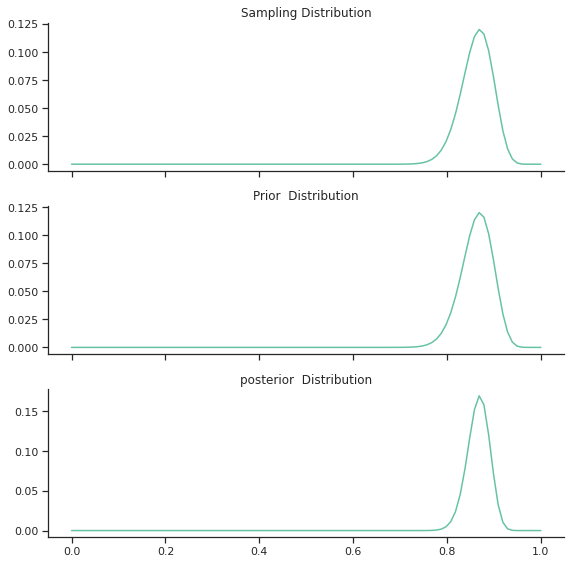

In [26]:
example_posterior=bern_post()

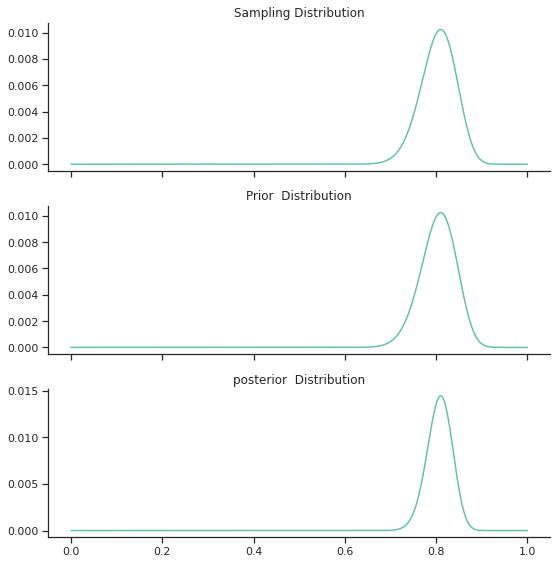

In [27]:
more_data=bern_post(1000)

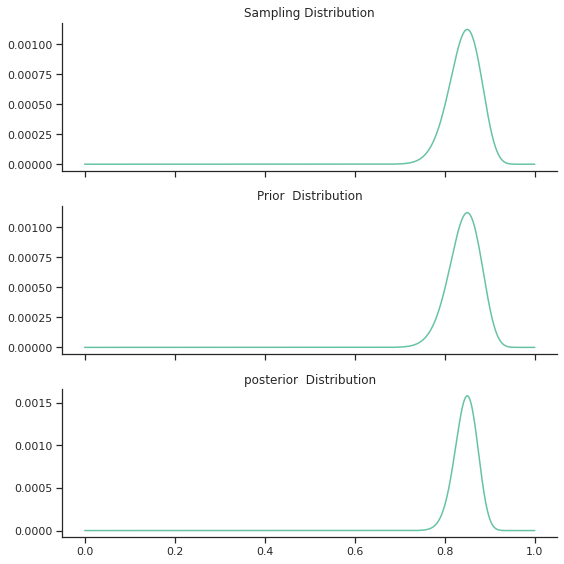

In [28]:
more_data=bern_post(10000)